In [10]:
import sys
sys.path = ['', '/home/submit/lavezzo/zstuff/WRemnants', '/home/submit/lavezzo/zstuff/WRemnants/narf', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '/opt/venv/lib/python3.10/site-packages']
import argparse
import os
import lz4.frame
import pickle
import hist
from utilities import boostHistHelpers as hh, logging
#import wremnants
import hdf5plugin
import h5py
import narf
from narf import ioutils
import ROOT
from utilities import input_tools as it
import mplhep as hep
import matplotlib.pyplot as plt
hep.style.use("CMS")
plt.style.use(hep.style.CMS)
plt.rcParams['figure.dpi'] = 50

Parameters

In [11]:
INPUT_FILE = '/data/submit/cms/store/user/lavezzo/ZBosonAnalysis/TheoryAgnostic/18_08_2023__17_16_42/mz_dilepton.hdf5'
LUMI = 'xx'

Looking at the contents of the hdf5 file

In [12]:
h5file = h5py.File(INPUT_FILE, "r")
results = narf.ioutils.pickle_load_h5py(h5file["results"])

In [13]:
processes = list(results.keys())
print(processes)

['dataPostVFP', 'ZmumuPostVFP', 'ZtautauPostVFP', 'QCDmuEnrichPt15PostVFP', 'Diboson', 'Top', 'Wtaunu', 'Wmunu', 'BkgZmumu', 'meta_info']


In [14]:
proc = "ZmumuPostVFP"

hists = list(results[proc]['output'].keys())
print(hists)

['xnorm', 'xnorm_massWeightZ', 'weight', 'nominal', 'nominal_ptll', 'nominal_mll', 'nominal_yll', 'nominal_etaPlus', 'nominal_etaMinus', 'nominal_ptPlus', 'nominal_ptMinus', 'nominal_massWeightZ']


Print 1D hists

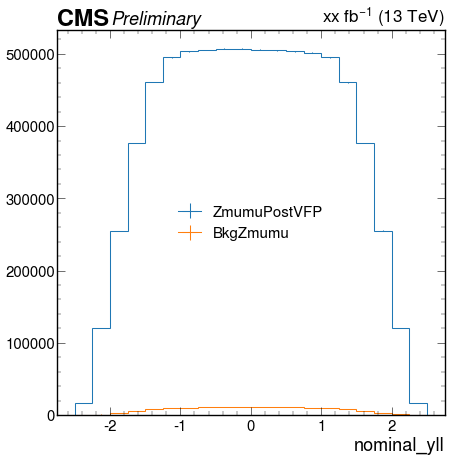

In [6]:
procs = ['ZmumuPostVFP', 'BkgZmumu']
hname = "nominal_yll"

hep.cms.label(llabel='Preliminary',data=False, lumi=LUMI)

for proc in procs:
    h = results[proc]['output'][hname].get()
    hep.histplot(h, yerr=True, label=proc)

_=plt.xlabel(hname)
_=plt.legend()
# plt.yscale('log')

Print 2D hists

Available axes:
ptll
yll
absYVgenSig
ptVgenSig
helicity


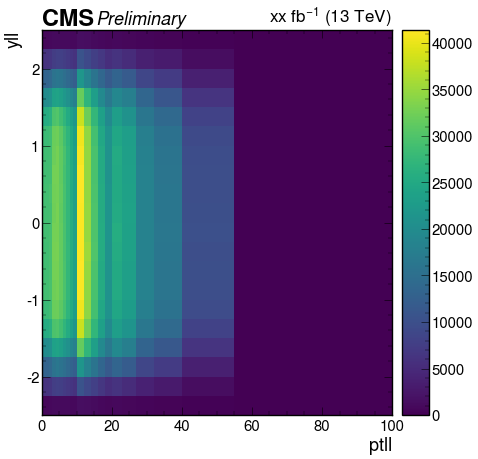

In [7]:
h = results['ZmumuPostVFP']['output']['nominal'].get()

print("Available axes:")
for ax in h.axes:
    print(ax.name)
    
hep.cms.label(llabel='Preliminary',data=False, lumi=LUMI)
_ = hep.hist2dplot(h[:,:,::sum,::sum,::sum])

Available axes:
ptll
yll
helicity


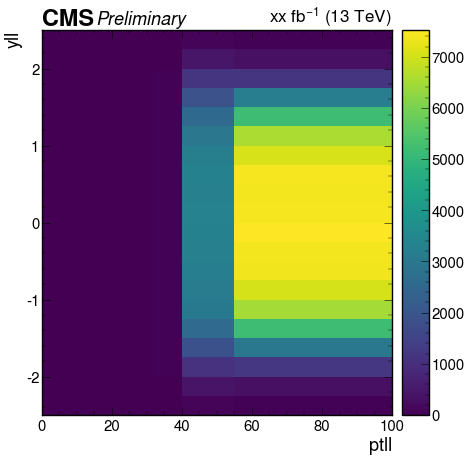

In [8]:
h = results['BkgZmumu']['output']['nominal'].get()

print("Available axes:")
for ax in h.axes:
    print(ax.name)
    
hep.cms.label(llabel='Preliminary',data=False, lumi=LUMI)
_ = hep.hist2dplot(h[:,:,::sum])

Angular coefficients $A_i$

Histogram shape: (20, 20, 5, 10, 9)


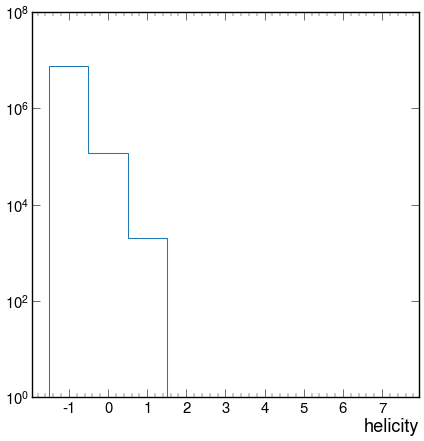

In [17]:
h = results['ZmumuPostVFP']['output']['nominal'].get()
print("Histogram shape:", h.shape)
_ = hep.histplot(h[::sum,::sum, ::sum, ::sum, :])
plt.yscale('log')
_=plt.ylim(1e0,1e8)